# Hiding Mass #

How much mass can you hide under a warmer mass of optically thin dust?

In [1]:
%matplotlib inline
import pylab as pl

In [2]:
import dust_emissivity
import higal_sedfitter
from astropy import units as u
import lmfit

Test case 1: A 30K and a 10K dusty region.  ....

   0.001: T= 14.6 K beta=  1.31
 0.00215: T= 16.7 K beta=  1.10
 0.00464: T= 15.7 K beta=  1.40
    0.01: T= 19.8 K beta=  1.88
  0.0215: T= 22.9 K beta=  1.63
  0.0464: T= 30.3 K beta=  1.15
     0.1: T= 35.7 K beta=  1.07
   0.215: T= 40.2 K beta=  0.72
   0.464: T= 42.7 K beta=  0.89
       1: T= 30.3 K beta=  1.71


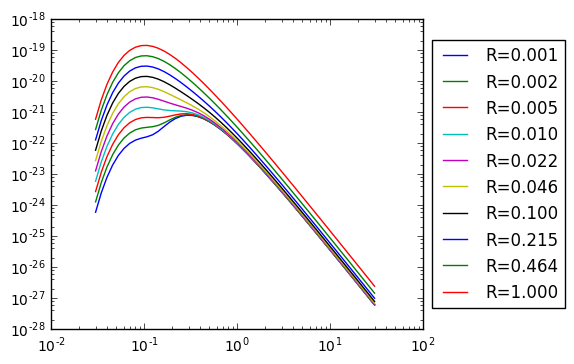

In [22]:
freqs = np.logspace(1, 4)*u.GHz
wavs = freqs.to(u.mm, u.spectral())
col_cool = 1e16*u.cm**-2
ratios = np.logspace(-3,0,10)
for ratio in ratios:
    s30 = dust_emissivity.blackbody.modified_blackbody(freqs, 30*u.K, column=col_cool*ratio, beta=1.75)
    s10 = dust_emissivity.blackbody.modified_blackbody(freqs, 10*u.K, column=col_cool, beta=1.75)
    fitted_tem_10 = dust_emissivity.fit_sed.fit_modified_bb(freqs, s10, np.ones_like(s10),
                                                            guesses=[50*u.K,2.0,col_cool])
    fitted_tem_both = dust_emissivity.fit_sed.fit_modified_bb(freqs, s10+s30, np.ones_like(s10),
                                                              guesses=[50*u.K,2.0,col_cool])
    print("{0:8.03g}: T={2:5.1f} beta={3:6.2f}".format(ratio, fitted_tem_10[0], fitted_tem_both[0], fitted_tem_both[1]))
    pl.loglog(wavs, s10+s30, label="R={0:0.3f}".format(ratio))

ax = pl.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

   0.001: T= 30.0 K beta=  1.75
 0.00316: T= 30.0 K beta=  1.75
    0.01: T= 30.0 K beta=  1.75
  0.0316: T= 30.0 K beta=  1.75
     0.1: T= 30.0 K beta=  1.75
   0.316: T= 30.1 K beta=  1.74
       1: T= 30.2 K beta=  1.72
    3.16: T= 30.6 K beta=  1.64
      10: T= 32.1 K beta=  1.40
    31.6: T= 36.6 K beta=  0.75


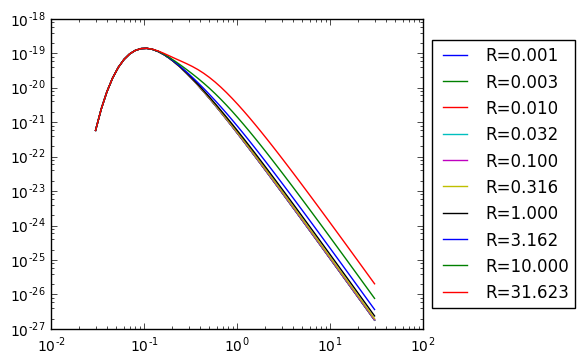

In [27]:
freqs = np.logspace(1, 4)*u.GHz
wavs = freqs.to(u.mm, u.spectral())
col_warm = 1e16*u.cm**-2
ratios = np.logspace(-3,1.5,10)
for ratio in ratios:
    s30 = dust_emissivity.blackbody.modified_blackbody(freqs, 30*u.K, column=col_warm, beta=1.75)
    s10 = dust_emissivity.blackbody.modified_blackbody(freqs, 10*u.K, column=col_warm*ratio, beta=1.75)
    fitted_tem_10 = dust_emissivity.fit_sed.fit_modified_bb(freqs, s10, np.ones_like(s10),
                                                            guesses=[10*u.K,2.0,col_warm])
    fitted_tem_both = dust_emissivity.fit_sed.fit_modified_bb(freqs, s10+s30, np.ones_like(s10),
                                                              guesses=[10*u.K,2.0,col_warm])
    print("{0:8.03g}: T={2:5.1f} beta={3:6.2f}".format(ratio, fitted_tem_10[0], fitted_tem_both[0], fitted_tem_both[1]))
    pl.loglog(wavs, s10+s30, label="R={0:0.3f}".format(ratio))

ax = pl.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))